In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [11]:
df=pd.read_csv('./input_data/streeteasy.csv')
df.shape

(5000, 20)

In [12]:
print(df.columns)

Index(['rental_id', 'building_id', 'rent', 'bedrooms', 'bathrooms',
       'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee',
       'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator',
       'has_dishwasher', 'has_patio', 'has_gym', 'neighborhood', 'submarket',
       'borough'],
      dtype='object')


In [5]:
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [4]:
df.describe()


,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11349.000000,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df1=df[['rent', 'bedrooms', 'bathrooms',
       'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee',
       'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator',
       'has_dishwasher', 'has_patio', 'has_gym', 'borough']]

In [47]:
df1.shape

(5000, 16)

In [48]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
df2 = pd.get_dummies(df1)
df2.head()
### END SOLUTION

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,borough_Brooklyn,borough_Manhattan,borough_Queens
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,0,1,0
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,0,1,0
2,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,0,0,1
3,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,0,1,0
4,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,0,1,0


In [57]:
df2.shape


(5000, 18)

In [49]:
corr=df2.corr().abs().loc['rent'].sort_values()
corr

min_to_subway        0.003652
has_patio            0.058260
has_roofdeck         0.081286
no_fee               0.091769
has_gym              0.093737
has_washer_dryer     0.096136
has_dishwasher       0.096631
has_doorman          0.099106
has_elevator         0.120822
building_age_yrs     0.122302
borough_Brooklyn     0.208110
borough_Queens       0.216399
floor                0.272351
borough_Manhattan    0.319835
bedrooms             0.531200
bathrooms            0.733644
size_sqft            0.808784
rent                 1.000000
Name: rent, dtype: float64

In [50]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = df2[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee',
        'has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym', 
        'borough_Brooklyn', 'borough_Manhattan', 'borough_Queens']]
y = df2["rent"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(5000, 17) (5000, 1)


In [51]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
### END SOLUTION

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 17)
(1000, 17)
(4000, 1)
(1000, 1)


# Scaled

In [53]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [54]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [55]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train_scaled.shape)
print(y_test_scaled.shape)

(4000, 17)
(1000, 17)
(4000, 1)
(1000, 1)


In [61]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym',
       'borough_Brooklyn', 'borough_Manhattan', 'borough_Queens'],
      dtype='object')

# Save standard Scaler to use in deployment

In [56]:
import pickle
pickle.dump(X_scaler, open('X_scaler.pkl','wb'))

In [64]:
pickle.dump(y_scaler, open('y_scaler.pkl','wb'))

In [65]:
y_scaler.pklinverse_transform?

# LinearRegression 

In [25]:
# train_scaled

from sklearn.linear_model import LinearRegression 
lm_model = LinearRegression()
lm_model.fit(X_train_scaled, y_train_scaled)
lm_predictions = lm_model.predict(X_train_scaled)

In [26]:
from sklearn.metrics import mean_squared_error
#pred_train_scaled= model.predict(X_train_scaled)
print(np.sqrt(mean_squared_error(y_train_scaled,lm_predictions)))

lm_pred= lm_model.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_test_scaled,lm_pred))) 

0.4803208104552405
0.48399483931391235


In [27]:
#from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_train_scaled, lm_predictions)
r2 = lm_model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2307080809563791, R2: 0.780747127664623


# LASSO

In [28]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

lasso_predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, lasso_predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

#MSE: 0.23164832150283815, R2: 0.7831831715156616

MSE: 0.23624132526159064, R2: 0.778884238971153


# RIDGE

In [29]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

ridge_predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, ridge_predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

 

MSE: 0.2346592072635557, R2: 0.7803650604353297


# ElasticNet model

In [30]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

el_predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, el_predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

#MSE: 0.2295263860678174, R2: 0.785169248117836

MSE: 0.23521271188358484, R2: 0.7798469944485461


# XGBoost Regressor

In [31]:
from xgboost import XGBRegressor

In [32]:
XGBModel = XGBRegressor()
XGBModel.fit(X_train_scaled, y_train_scaled , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, XGBpredictions)
r2 = XGBModel.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")


#MSE: 0.19060038108538463, R2: 0.8216029804717015

MSE: 0.19060038108538463, R2: 0.8216029804717015


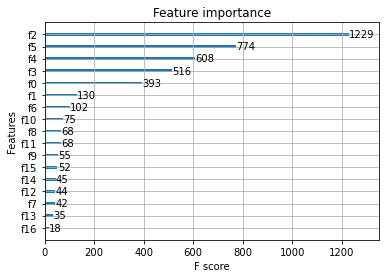

In [35]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(XGBModel)
pyplot.show()

In [58]:
print(X_train.columns)

Index(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym',
       'borough_Brooklyn', 'borough_Manhattan', 'borough_Queens'],
      dtype='object')


In [59]:
cat = X_train.filter(like = 'borough')

In [ ]:
index_dict = dict(zip(cat.columns,range(cat.shape[1])))

with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2)  

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

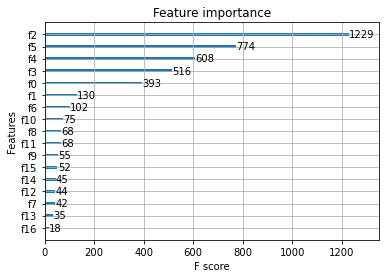

In [37]:
plot_importance(XGBModel)

In [42]:
import joblib

In [43]:
model_columns = list(X_train.columns)
joblib.dump(model_columns, 'XGB_model_columns.pkl')

['XGB_model_columns.pkl']

In [44]:
#import pickle

# Save to file in the current working directory
pkl_filename = "XGBModel.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(XGBModel, file)

# Neural Network

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [59]:
# Define model
model = Sequential()
model.add(Dense(500, input_dim=24, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))
#model.summary() #Print model Summary

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 500)               12500     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 67,701
Trainable params: 67,701
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])             
           

In [64]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 4000 samples
Epoch 1/100
4000/4000 - 0s - loss: 0.0602 - mean_squared_error: 0.0602
Epoch 2/100
4000/4000 - 0s - loss: 0.0607 - mean_squared_error: 0.0607
Epoch 3/100
4000/4000 - 0s - loss: 0.0659 - mean_squared_error: 0.0659
Epoch 4/100
4000/4000 - 0s - loss: 0.0635 - mean_squared_error: 0.0635
Epoch 5/100
4000/4000 - 0s - loss: 0.0588 - mean_squared_error: 0.0588
Epoch 6/100
4000/4000 - 0s - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 7/100
4000/4000 - 0s - loss: 0.0574 - mean_squared_error: 0.0574
Epoch 8/100
4000/4000 - 0s - loss: 0.0550 - mean_squared_error: 0.0550
Epoch 9/100
4000/4000 - 0s - loss: 0.0581 - mean_squared_error: 0.0581
Epoch 10/100
4000/4000 - 0s - loss: 0.0570 - mean_squared_error: 0.0570
Epoch 11/100
4000/4000 - 0s - loss: 0.0579 - mean_squared_error: 0.0579
Epoch 12/100
4000/4000 - 0s - loss: 0.0522 - mean_squared_error: 0.0522
Epoch 13/100
4000/4000 - 0s - loss: 0.0526 - mean_squared_error: 0.0526
Epoch 14/100
4000/4000 - 0s - loss: 0.0521 - mean_s

In [87]:
pred_train_scaled= model.predict(X_train_scaled)
print(np.sqrt(mean_squared_error(y_train_scaled,pred_train_scaled)))

pred= model.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_test_scaled, pred))) 

# 0.14748630257944645
# 0.49341150403947387

0.14748630257944645
0.49341150403947387


# Save Deep Learning Model

In [88]:
filepath="C:\\Users\\sumita\\Documents\\RutgersDS\\Project3\\saved_models\\"
model.save(filepath)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\sumita\Documents\RutgersDS\Project3\saved_models\assets


In [89]:
# Save Xgboost model
import joblib

filename = 'XGBModel.sav'
joblib.dump(XGBModel, filename)

['XGBModel.sav']

In [90]:
filename = 'Linear_Regression_Model.sav'
joblib.dump(lm_model, filename)

['Linear_Regression_Model.sav']

In [91]:
filename = 'lasso_Model.sav'
joblib.dump(lasso, filename)

['lasso_Model.sav']

In [92]:
filename = 'ridge_Model.sav'
joblib.dump(ridge, filename)

['ridge_Model.sav']

In [93]:
filename = 'elasticnet_Model.sav'
joblib.dump(elasticnet, filename)


['elasticnet_Model.sav']